In [1]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
X = []
cols = ['pid', 'chr', 'dir', 'fifo', 'ipv4', 'reg', 'node', 'unix', 'time']
for f in sorted(glob('20190726/*')):
    ftime = f.split('-')[1].split('.')[0][0:4]
    x = pd.read_fwf(f)
    x = x[(x.TYPE != 'sock') & (x.TYPE != 'nown')]
    y = pd.DataFrame(x.groupby(['PID', 'TYPE']).size())
    z = y.unstack()
    z['time'] = ftime
    [X.append(row) for row in z.reset_index().values]

In [21]:
df = pd.DataFrame(X, columns=cols)
df1 = df[['pid', 'time', 'reg', 'ipv4']]
df2 = df[['pid', 'chr', 'dir', 'fifo', 'node', 'unix', 'time']]

In [22]:
df3 = pd.DataFrame(df1.groupby('pid')['time'].nunique())
df4 = df3.loc[df3.time > 9].reset_index().drop('time', axis=1)
df4['ws'] = np.where(df4.index % 2 == 0, 'server', 'worker')
df5 = pd.merge(df1, df4, left_on='pid', right_on='pid').fillna(0)
df6 = pd.merge(df1, df4, left_on='pid', right_on='pid').fillna(0)
df5[df5.ws == 'server']

,pid,time,reg,ipv4,ws
0,1835,0300,8.0,0.0,server
1,1835,0301,8.0,0.0,server
2,1835,0302,8.0,0.0,server
3,1835,0303,8.0,0.0,server
4,1835,0304,8.0,0.0,server
...,...,...,...,...,...
355,5478,0455,230.0,10.0,server
356,5478,0456,540.0,9.0,server
357,5478,0457,540.0,9.0,server
358,5478,0458,230.0,10.0,server


In [23]:
df5.stack()

0    pid       1835
     time      0300
     reg          8
     ipv4         0
     ws      server
              ...  
479  pid       5965
     time      0459
     reg        176
     ipv4        17
     ws      worker
Length: 2400, dtype: object

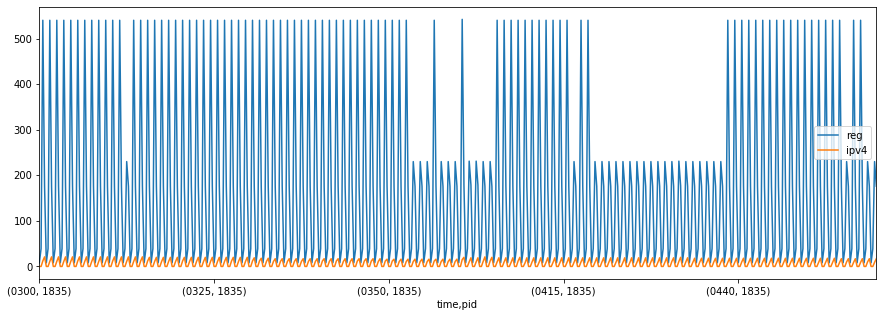

In [24]:
plt.rcParams['figure.figsize'] = (15, 5)
for t in [df5]:
    t.pivot(index='time', columns='pid').stack().plot()
    plt.show()

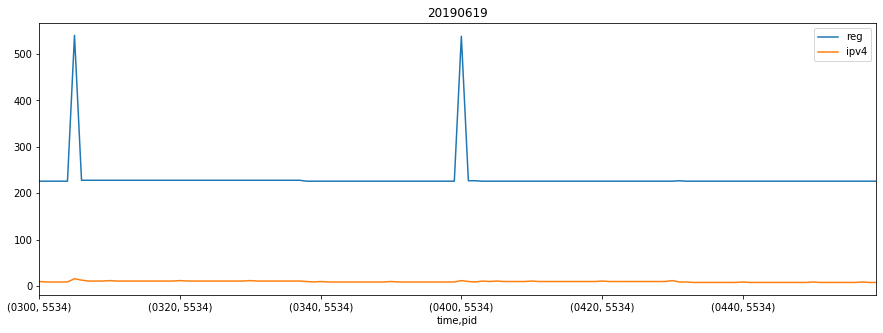

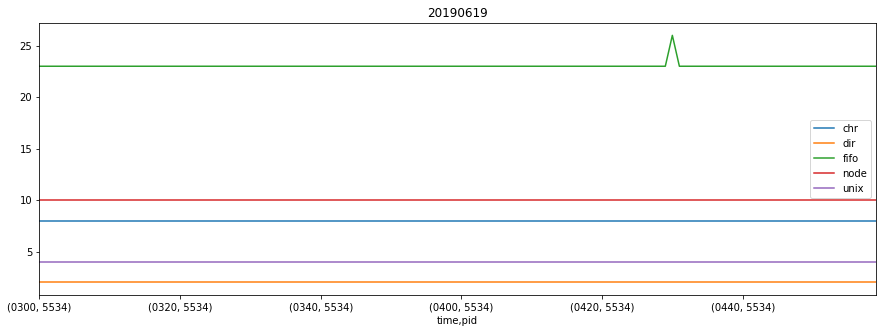

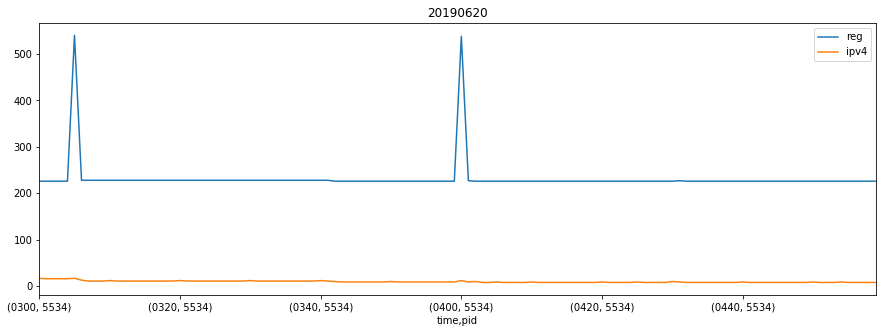

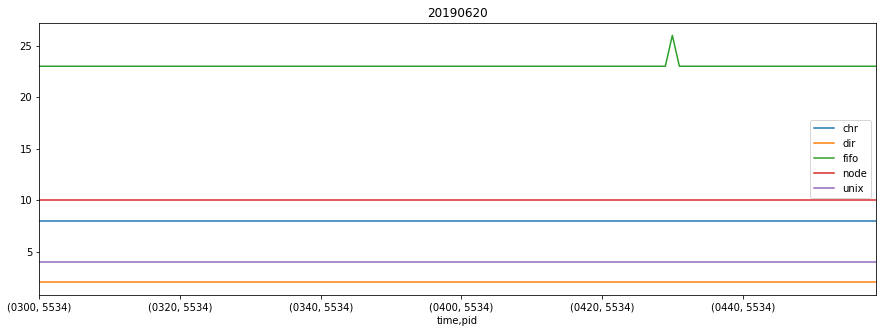

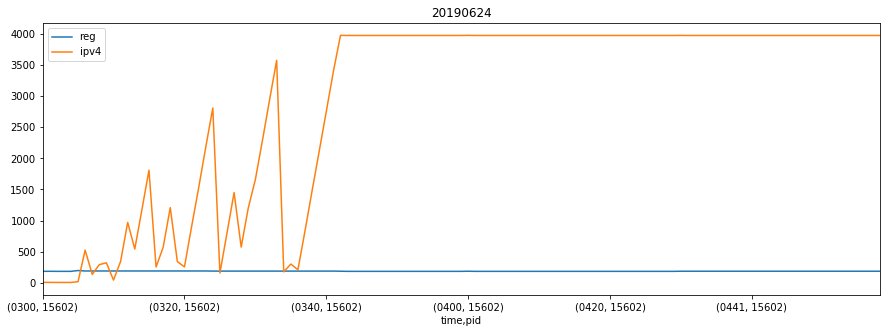

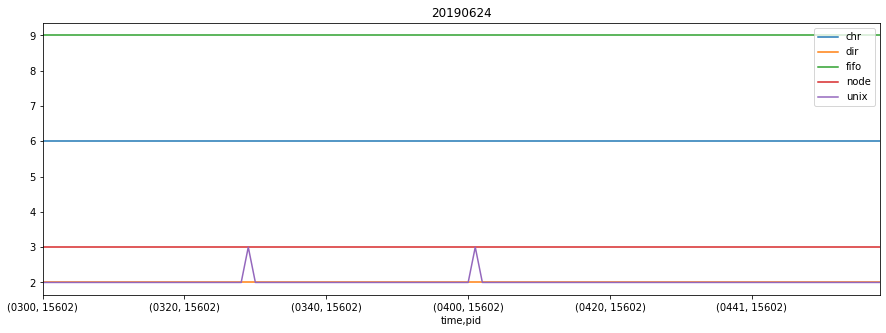

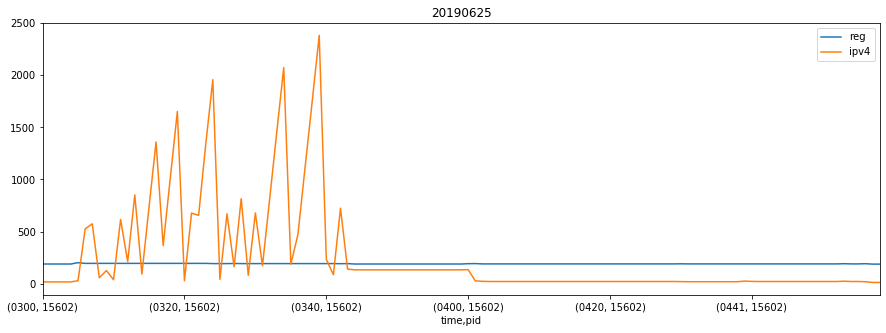

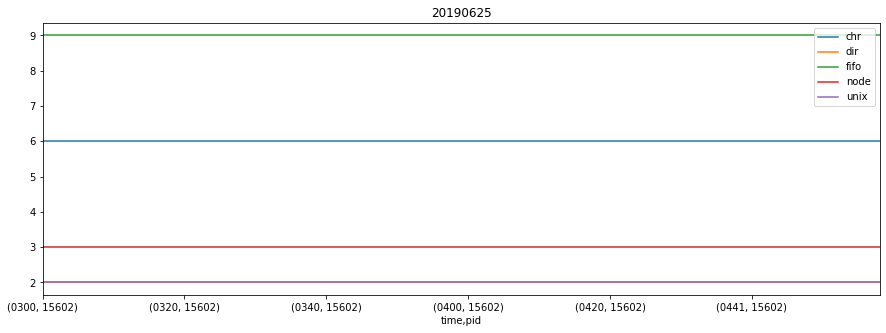

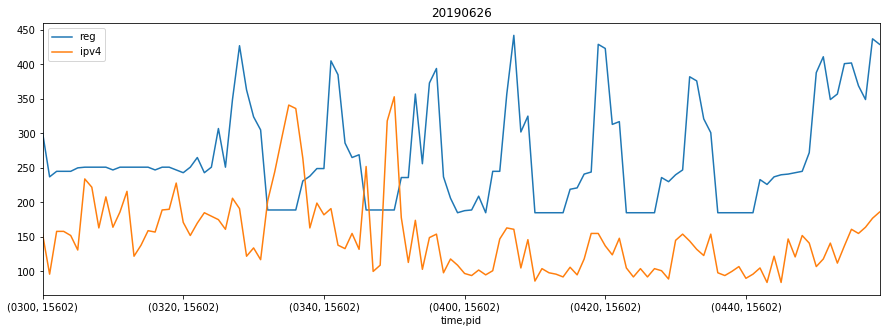

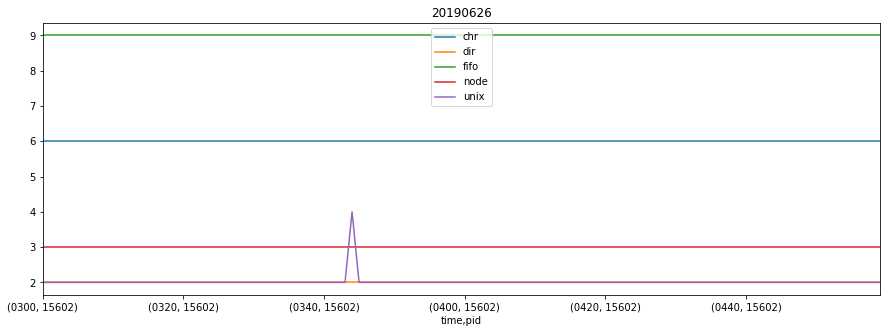

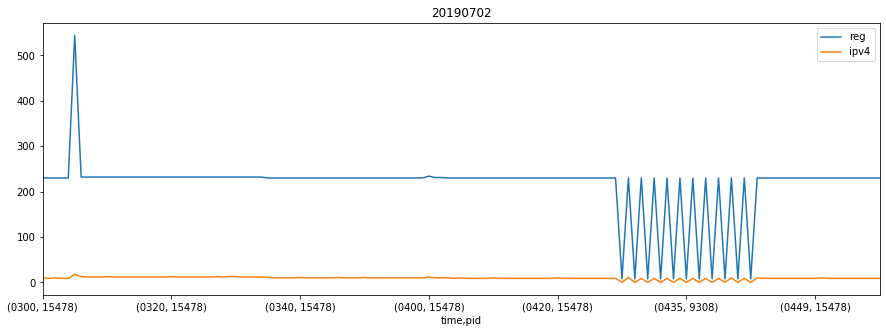

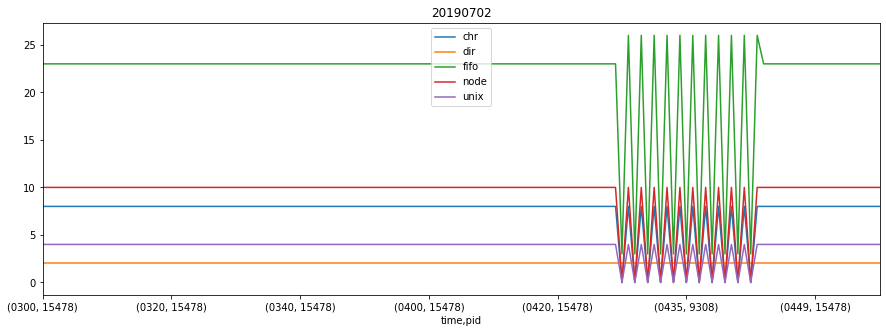

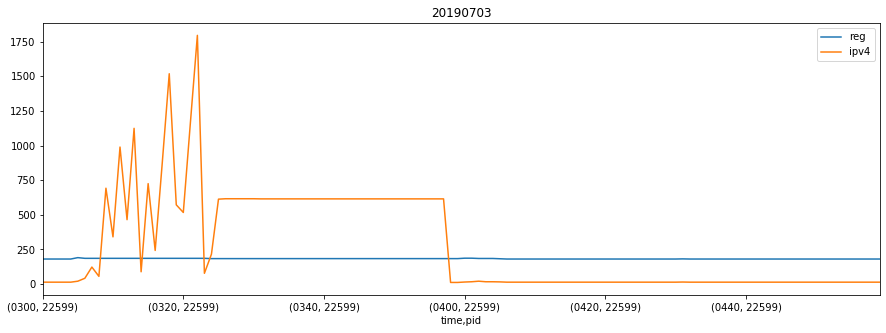

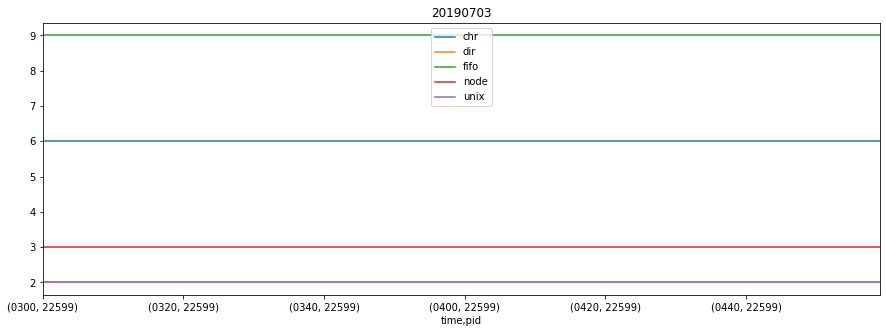

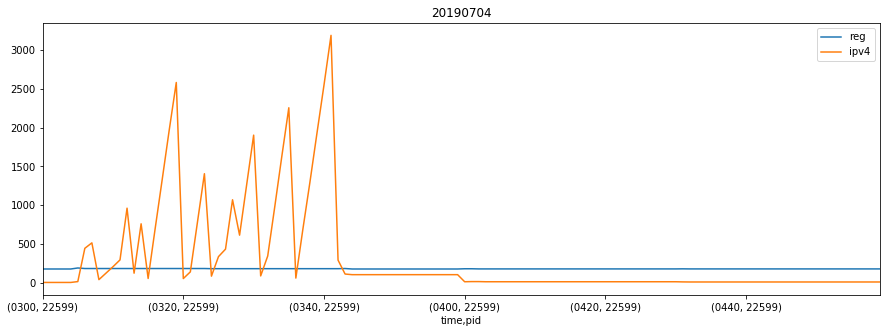

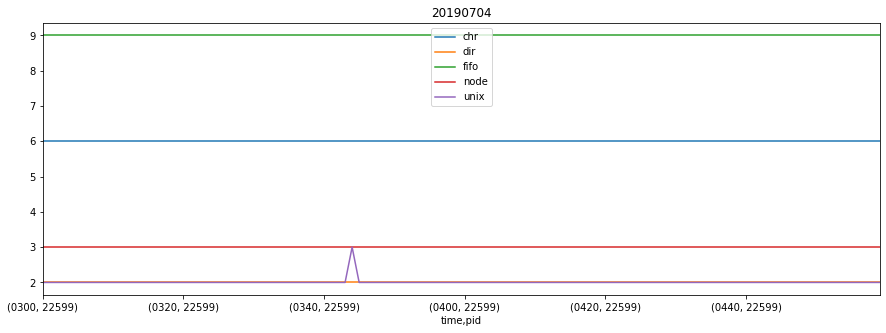

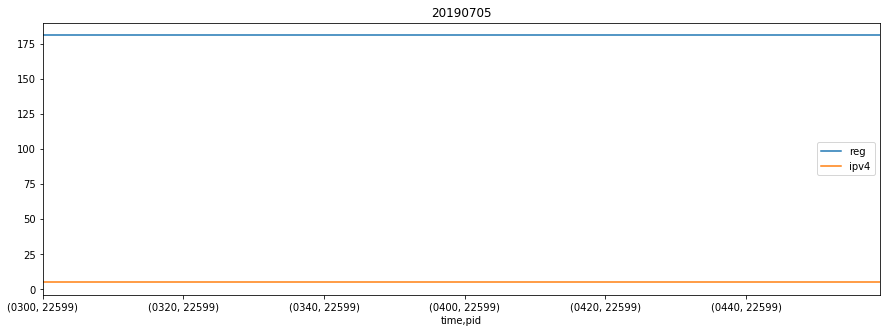

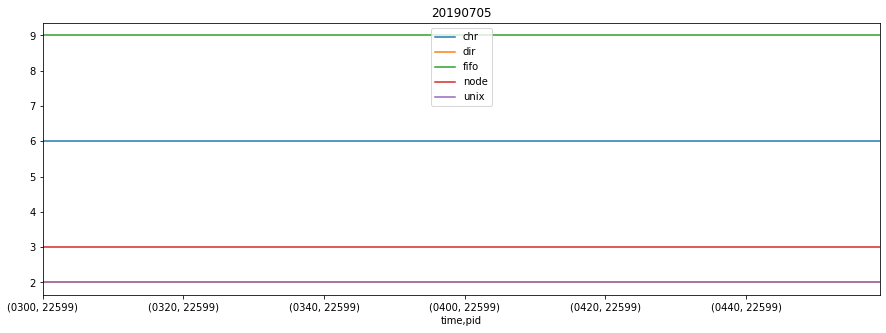

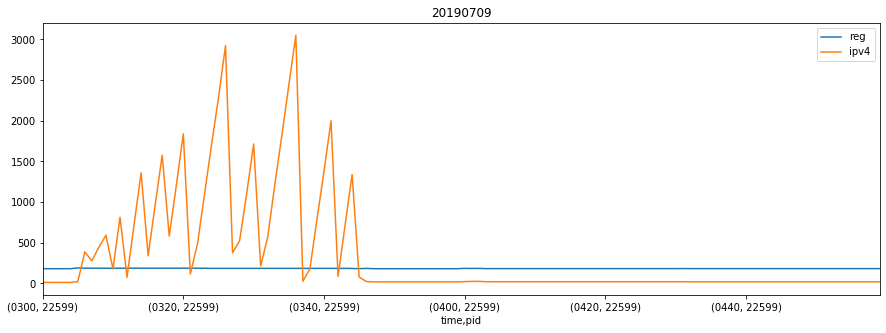

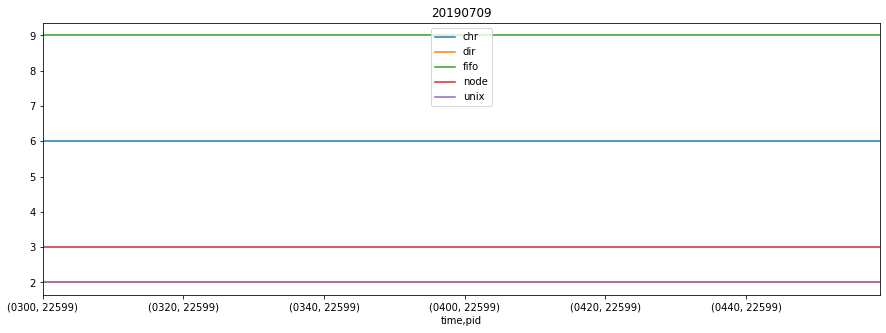

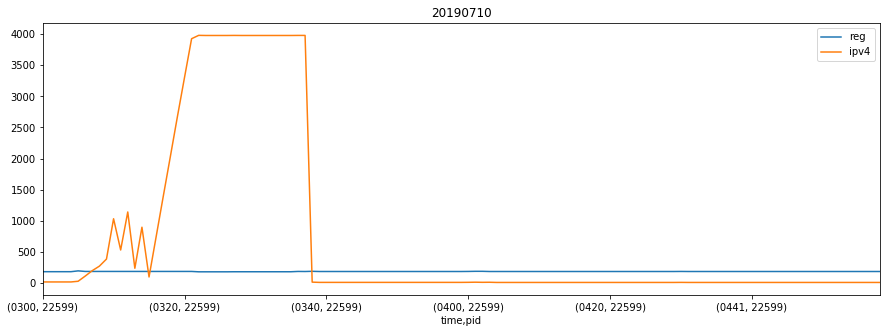

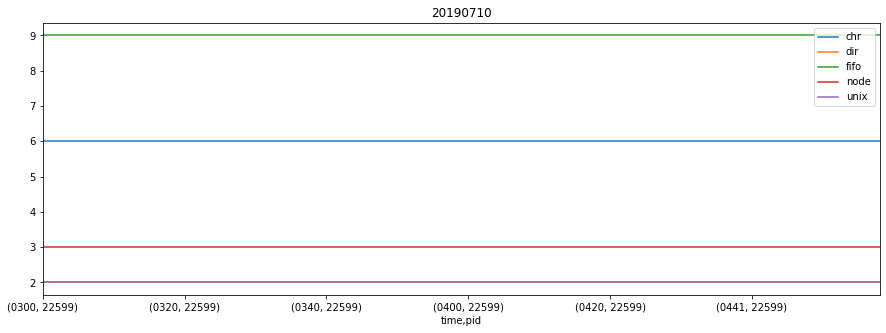

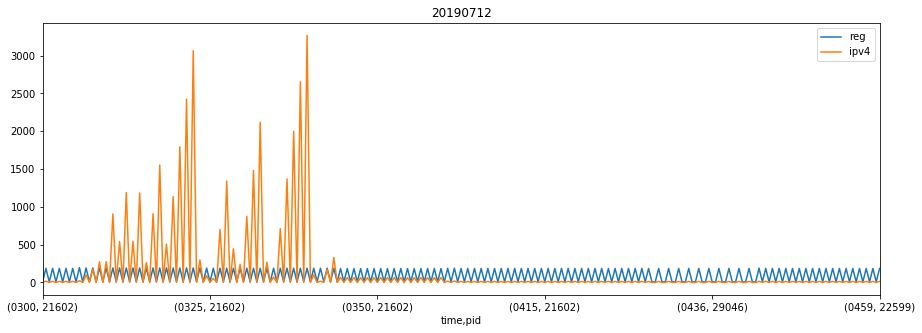

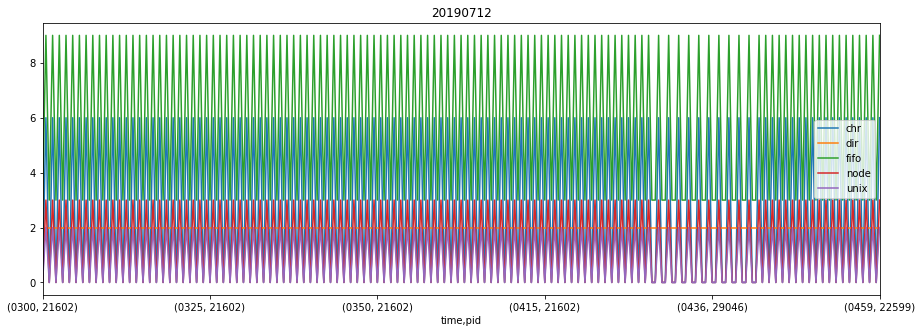

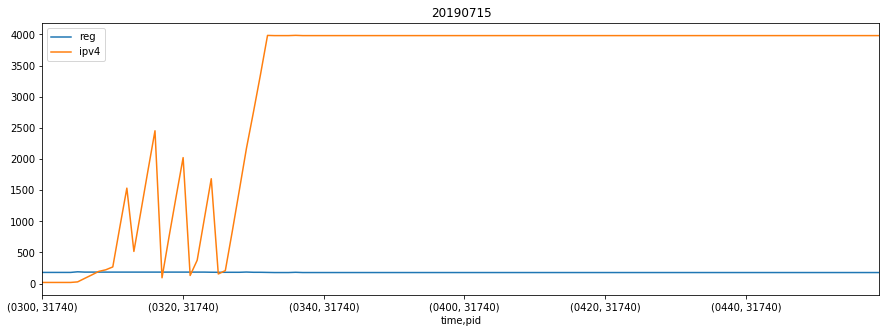

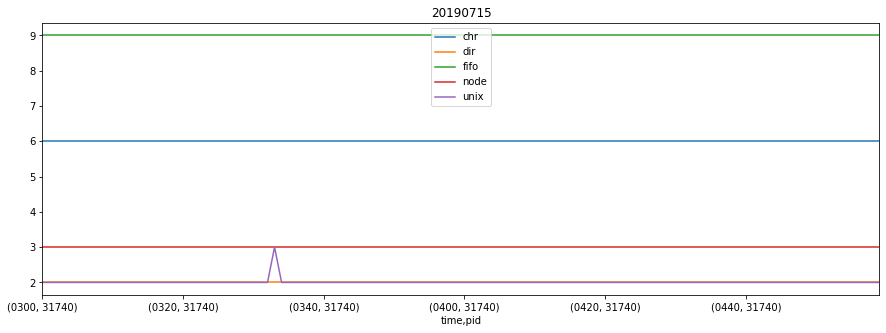

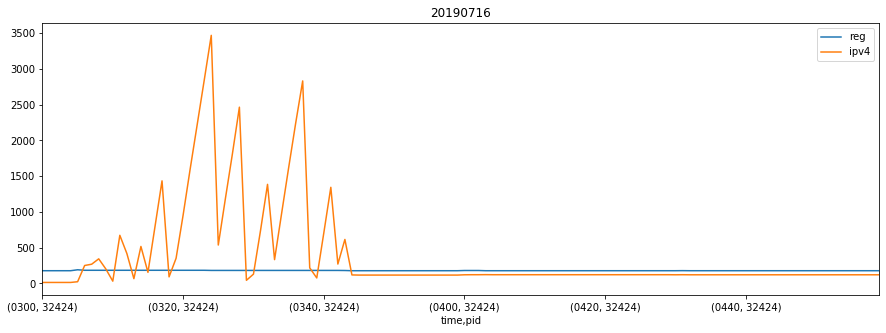

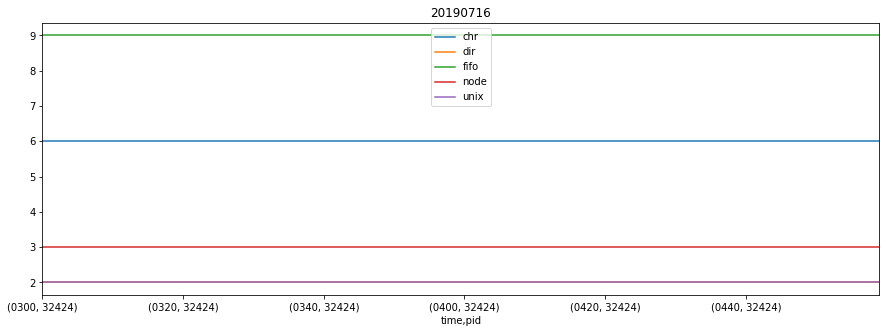

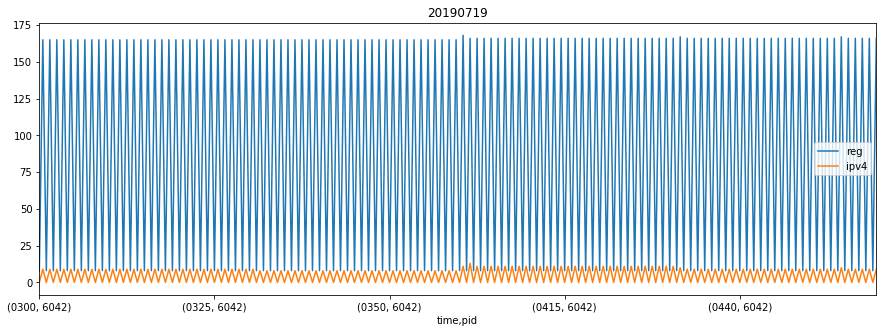

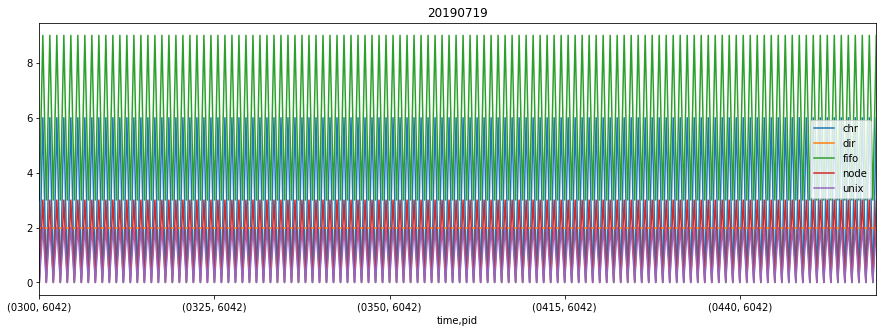

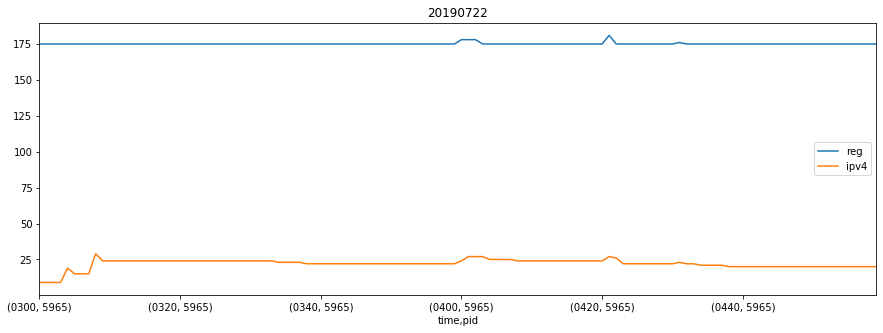

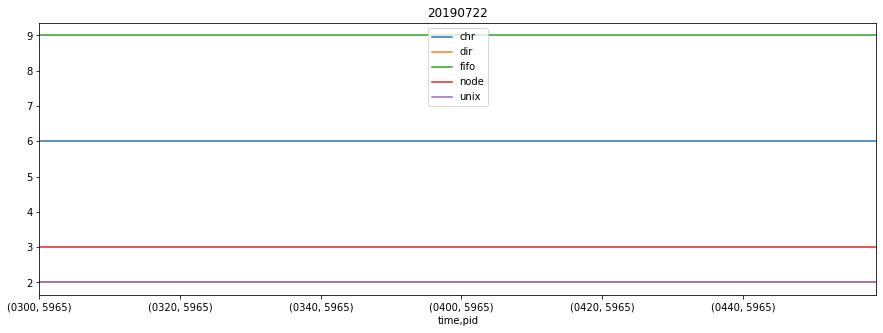

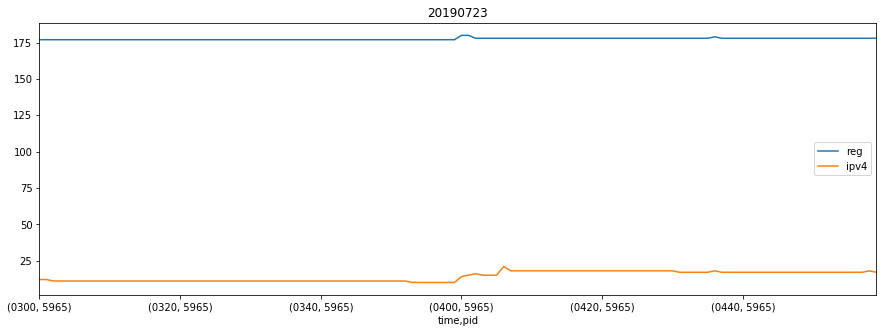

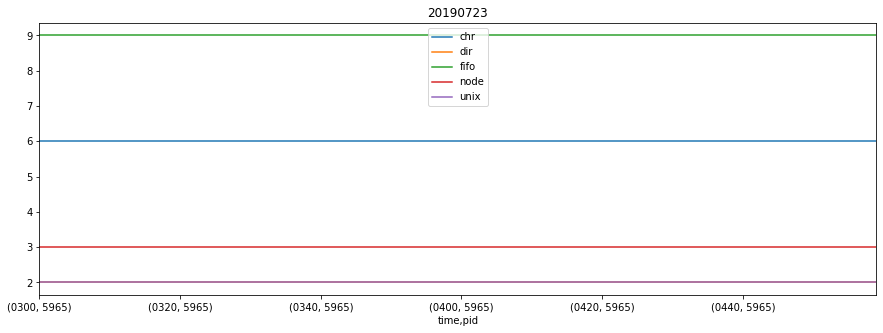

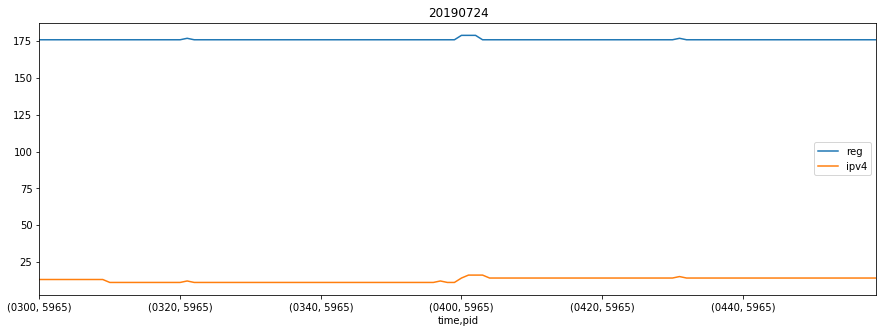

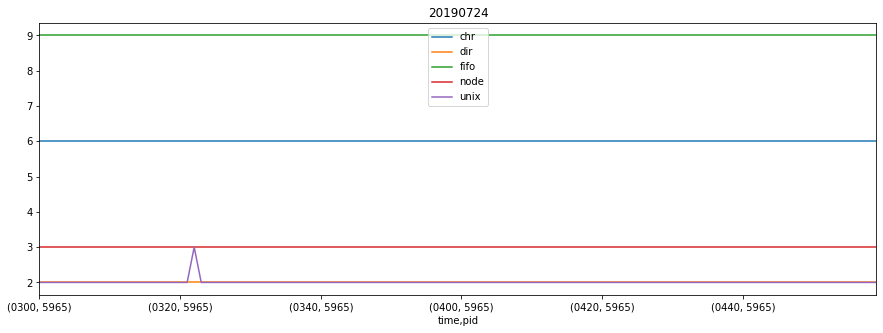

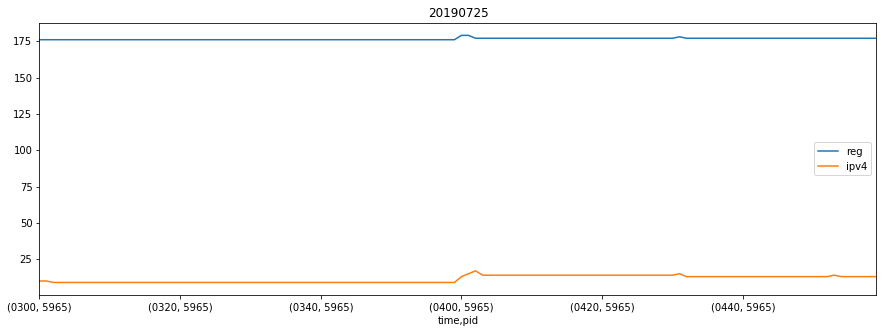

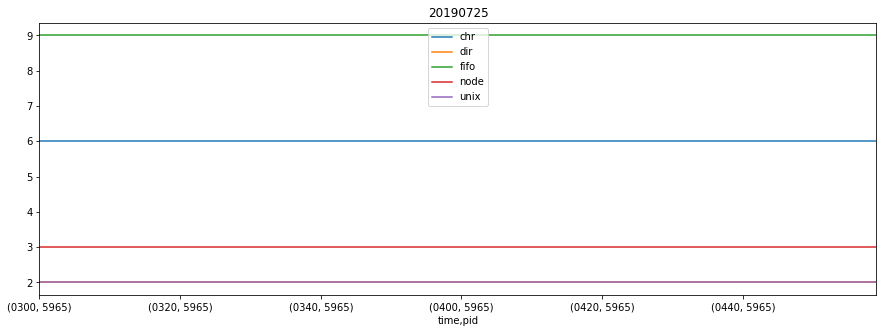

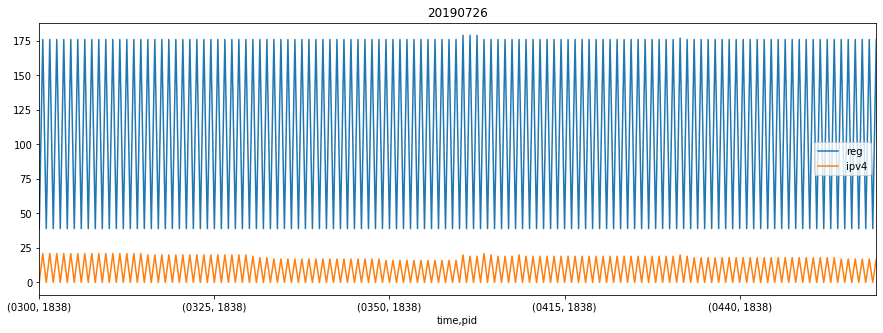

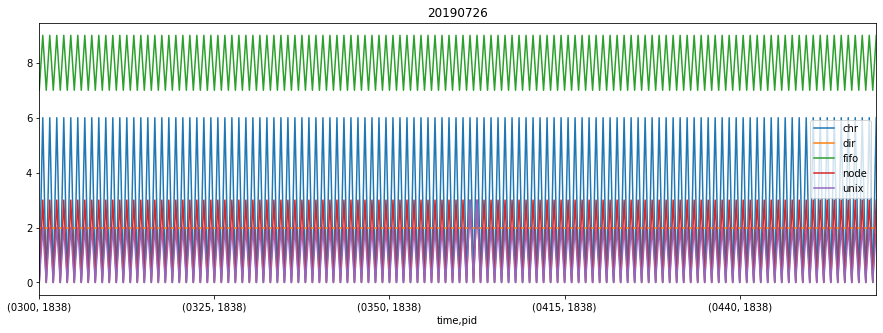

In [25]:
plt.rcParams['figure.figsize'] = (15, 5)
ws = 'worker'
cols = ['pid', 'chr', 'dir', 'fifo', 'ipv4', 'reg', 'node', 'unix', 'time']
for d in sorted(glob('2019*[!718]')):
    X = []
    for f in sorted(glob('{}/*'.format(d))):
        ftime = f.split('-')[1].split('.')[0][0:4]
        x = pd.read_fwf(f)
        x = x[(x.TYPE != 'sock') & (x.TYPE != 'nown')]
        y = pd.DataFrame(x.groupby(['PID', 'TYPE']).size())
        z = y.unstack()
        z['time'] = ftime
        [X.append(row) for row in z.reset_index().values]
    df = pd.DataFrame(X, columns=cols)
    df1 = df[['pid', 'time', 'reg', 'ipv4']]
    df2 = df[['pid', 'chr', 'dir', 'fifo', 'node', 'unix', 'time']]
    df3 = pd.DataFrame(df1.groupby('pid')['time'].nunique())
    df4 = df3.loc[df3.time > 9].reset_index().drop('time', axis=1)
    df4['ws'] = np.where(df4.index % 2 == 0, 'server', 'worker')
    df5 = pd.merge(df1, df4, left_on='pid', right_on='pid').fillna(0)
    df5 = df5[df5.ws == ws]
    df6 = pd.merge(df2, df4, left_on='pid', right_on='pid').fillna(0)
    df6 = df6[df6.ws == ws]
    for t in [df5,df6]:
        t.pivot(index='time', columns='pid').stack().plot()
        plt.title(d)
        plt.show()